In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [90]:
X = np.random.normal(0,1,20)

In [91]:
X

array([ 0.7469355 , -0.68079387,  0.61888085,  1.94189884, -0.24674194,
       -0.87177786,  0.94400165, -1.10136129, -0.5951785 ,  1.09272805,
        0.27461551, -1.03338845,  1.16739295,  0.49596993, -0.15181333,
        0.91029857, -0.47235756, -0.67640366, -1.18799991,  0.28732728])

In [94]:
T = lambda x : np.median(x)

In [95]:
T(X)

0.06140108937222977

In [96]:
n=20
def Fn(x):
    return((1/n)*sum([1*(X[i]<=x) for i in range(n)]))

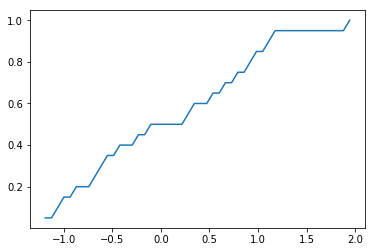

In [97]:
plt.plot(np.linspace(min(X),max(X)),[Fn(x) for x in np.linspace(min(X),max(X))])

In [98]:
def Q(p):
    return(min([x for x in X if Fn(x)>p]))

In [99]:
B = 300
T_b = []
for b in range(B):
    T_b.append(T(np.array([Q(np.random.uniform(0,1)) for _ in range(n)])))

(array([0.00333333, 0.02666667, 0.05      , 0.09666667, 0.12      ,
        0.17      , 0.22333333, 0.37666667, 0.38333333, 0.43333333,
        0.54333333, 0.55333333, 0.56      , 0.75      , 0.82333333,
        0.88666667, 0.92333333, 0.95      , 0.98      , 1.        ]),
 array([-0.77628587, -0.69604072, -0.61579558, -0.53555043, -0.45530529,
        -0.37506014, -0.294815  , -0.21456985, -0.13432471, -0.05407956,
         0.02616558,  0.10641073,  0.18665587,  0.26690102,  0.34714616,
         0.42739131,  0.50763645,  0.5878816 ,  0.66812674,  0.74837189,
         0.82861703]),
 <a list of 20 Patch objects>)

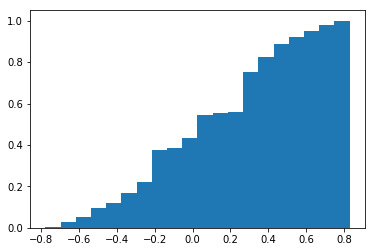

In [105]:
plt.hist(T_b,bins=20,cumulative=True,density=True)

In [101]:
np.var(T_b)

0.13692733839353527

In [103]:
(1/B)*sum([(T_b[b]-(1/B)*sum([T_b[r] for r in range(B)]))**2 for b in range(B)])

0.13692733839353532

In [11]:
import pandas as pd

In [15]:
?pd.read_csv

In [20]:
Datos = pd.read_csv("housing_in_london_yearly_variables.csv")

In [21]:
Datos.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [19]:
Datos.shape

(1071, 12)

In [13]:
type(Datos)

pandas.core.frame.DataFrame

In [50]:
Datos['SalarioMedio'] = pd.to_numeric(Datos.mean_salary,errors='coerce')

In [54]:
Datos = Datos[~Datos['SalarioMedio'].isnull()]

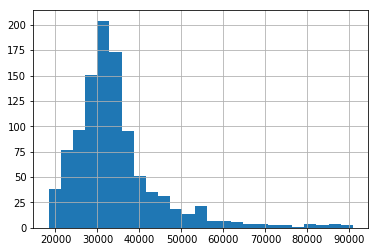

In [59]:
Datos['SalarioMedio'].hist(bins=25)

In [61]:
def GINI(X):
    n = len(X)
    g1 = sum([abs(x - y) for x in X for y in X])
    g2 = 2*n*sum(X)
    return(g1/g2)

In [109]:
GINI_Real = GINI(Datos.SalarioMedio)

In [129]:
ginis = []
for b in range(1000):
    X_ = np.random.choice(Datos.SalarioMedio,len(Datos.SalarioMedio))
    ginis.append(GINI(X_))

In [130]:
np.std(ginis)

0.0050013410760097795

In [131]:
import scipy.stats as sts

In [132]:
C1 = (GINI_Real+sts.norm.ppf(0.05/2)*np.std(ginis),GINI_Real-sts.norm.ppf(0.05/2)*np.std(ginis))

In [133]:
C1

(0.1463828030168101, 0.16598769978357)

In [134]:
C2 = (2*GINI_Real-np.quantile(a=ginis,q=1-0.05/2),2*GINI_Real-np.quantile(a=ginis,q=0.05/2))

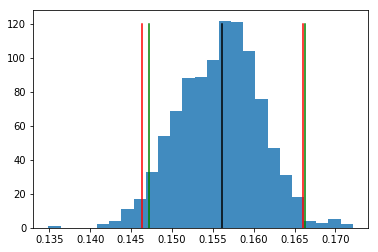

In [137]:
p= plt.hist(ginis,bins=25,alpha=0.85)
plt.plot([GINI_Real,GINI_Real],[0,120],color='black')
plt.plot([C1[0],C1[0]],[0,120],color='red')
plt.plot([C1[1],C1[1]],[0,120],color='red')

plt.plot([C2[0],C2[0]],[0,120],color='green')
plt.plot([C2[1],C2[1]],[0,120],color='green')

In [167]:
X = list(Datos.SalarioMedio)
n = len(X)
GINI_Real = GINI(X)

In [161]:
T_i = []
for i in range(n):
    T_i.append(GINI(X[0:i] + X[i+1:]))

In [163]:
sesgo = (n-1)*(np.mean(T_i)-GINI(X))
sesgo

-0.00018035992229714637

In [165]:
GINI_jack = GINI(X) - sesgo
GINI_jack

0.1563656113224872

In [170]:
GINI_i = [n*GINI_Real-(n-1)*T_i[i] for i in range(n)]

In [175]:
std_jack = np.sqrt(((np.var(GINI_i)*n)/(n-1))/n)

In [176]:
C1 = (GINI_Real+sts.norm.ppf(0.05/2)*std_jack,GINI_Real-sts.norm.ppf(0.05/2)*std_jack)

In [177]:
C1

(0.14635771778475895, 0.16601278501562114)